# AUC ROC curves

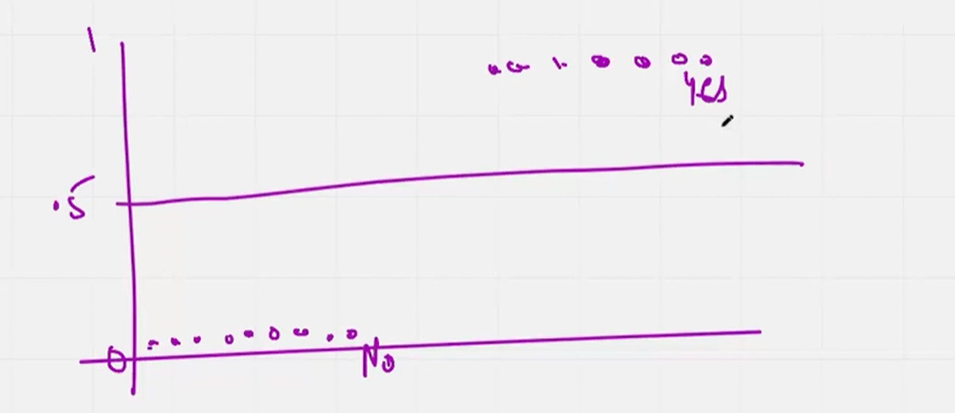

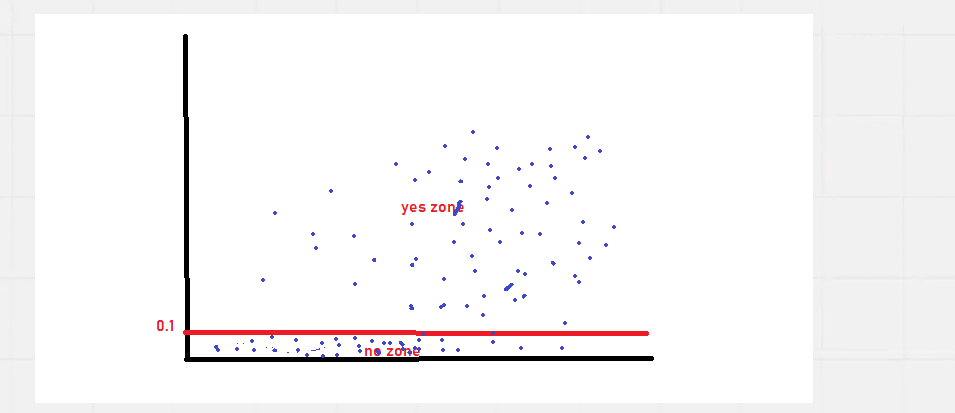

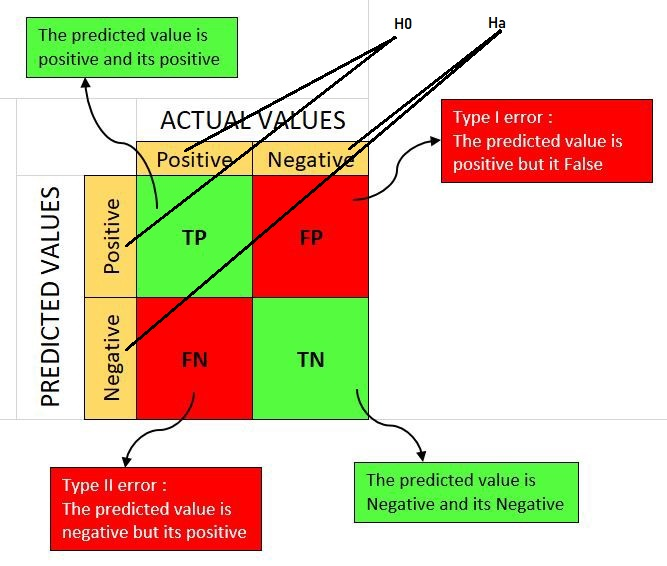

 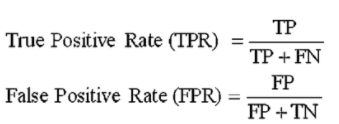

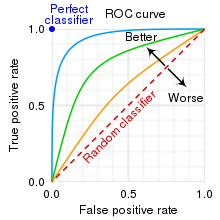

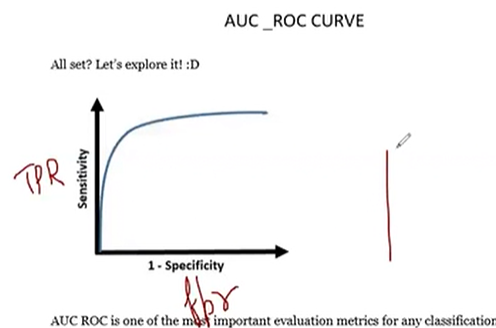

#### What is ROC?

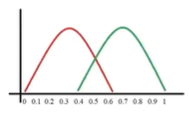

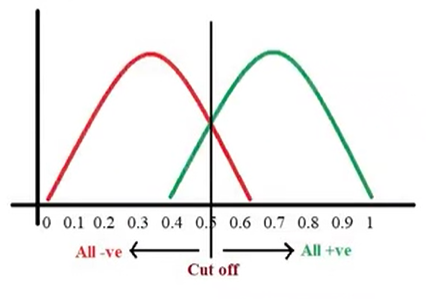

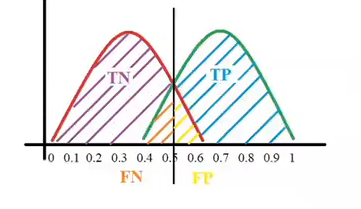

Points below 0.5 are considered to be negative. Hence positive points below 0.5 are False Negative

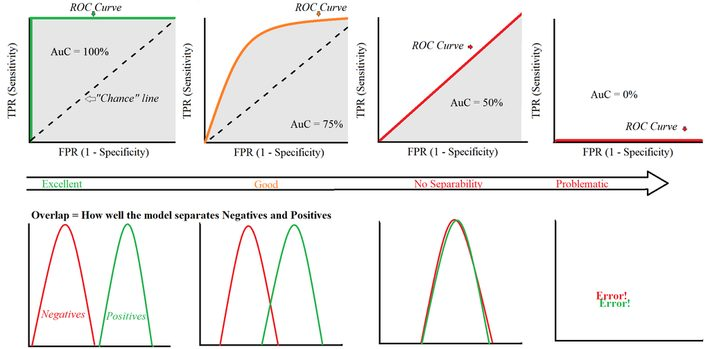

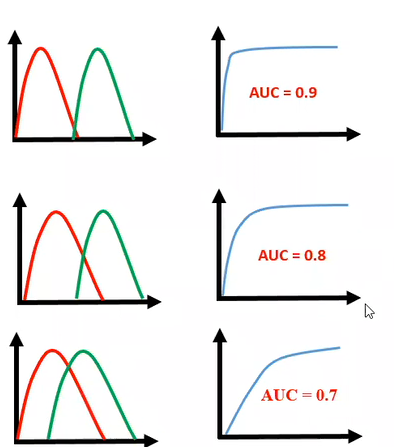

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [52]:
data=load_breast_cancer()

In [102]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [54]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [55]:
data.feature_names #column names of independent variables

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [100]:
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [101]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [99]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [59]:
cancer_data=pd.DataFrame(data.data,columns=data.feature_names)

In [60]:
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [61]:
cancer_target=pd.DataFrame(data.target)

In [62]:
cancer_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [63]:
x=cancer_data
y=cancer_target

In [64]:
x.shape

(569, 30)

In [65]:
y.shape

(569, 1)

In [66]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.22,random_state=42) #both x and y should be 2D

In [67]:
train_x.shape

(443, 30)

In [68]:
test_x.shape

(126, 30)

In [69]:
train_y.shape

(443, 1)

In [70]:
test_y.shape

(126, 1)

In [71]:
lg=LogisticRegression() #creating object 'lg' from class LogisticRegression()

In [72]:
lg.fit(train_x,train_y)

LogisticRegression()

In [73]:
pred=lg.predict(test_x)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [74]:
print('accuracy score=',accuracy_score(pred,test_y))

accuracy score= 0.9682539682539683


In [75]:
print(confusion_matrix(test_y,pred))

[[44  3]
 [ 1 78]]


### AUC_ROC curve

In [76]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [77]:
y_pred_prob=lg.predict_proba(test_x)[:,1]

#predict_proba predicts the probability.
# lg.predict_proba(test_x)[:,1] means predict probability of all rows which actually has cancer.

In [78]:
y_pred_prob_0=lg.predict_proba(test_x)[:,0]

In [79]:
y_pred_prob

array([8.62963875e-01, 2.41924005e-09, 4.15938093e-03, 9.96903386e-01,
       9.98553827e-01, 5.22187555e-10, 6.04131502e-13, 4.63336995e-03,
       9.96636320e-01, 9.83361888e-01, 9.48318148e-01, 2.27186439e-04,
       9.85821346e-01, 3.95238020e-01, 9.95421801e-01, 8.79122777e-04,
       9.96169722e-01, 9.99663027e-01, 9.94903146e-01, 1.83029305e-07,
       8.54124703e-01, 9.64600230e-01, 2.63510983e-09, 9.93504657e-01,
       9.88883390e-01, 9.99215571e-01, 9.96697790e-01, 9.94784106e-01,
       9.91940410e-01, 3.56591191e-08, 9.95885578e-01, 9.97641162e-01,
       9.69579139e-01, 9.84246138e-01, 9.97969733e-01, 9.96295256e-01,
       1.71955429e-03, 9.83445371e-01, 2.83799765e-06, 8.94549798e-01,
       9.97726630e-01, 1.18909185e-03, 9.99106674e-01, 9.89270344e-01,
       9.97227400e-01, 9.54416676e-01, 9.98283717e-01, 9.83660292e-01,
       9.26230999e-01, 9.95628129e-01, 9.12383187e-05, 1.20448328e-09,
       9.61278584e-01, 9.96901044e-01, 9.99046417e-01, 9.80535454e-01,
      

In [80]:
y_pred_prob_0

array([1.37036125e-01, 9.99999998e-01, 9.95840619e-01, 3.09661399e-03,
       1.44617281e-03, 9.99999999e-01, 1.00000000e+00, 9.95366630e-01,
       3.36367982e-03, 1.66381116e-02, 5.16818523e-02, 9.99772814e-01,
       1.41786536e-02, 6.04761980e-01, 4.57819870e-03, 9.99120877e-01,
       3.83027790e-03, 3.36972510e-04, 5.09685424e-03, 9.99999817e-01,
       1.45875297e-01, 3.53997697e-02, 9.99999997e-01, 6.49534328e-03,
       1.11166101e-02, 7.84428765e-04, 3.30221009e-03, 5.21589384e-03,
       8.05958994e-03, 9.99999964e-01, 4.11442250e-03, 2.35883754e-03,
       3.04208613e-02, 1.57538618e-02, 2.03026697e-03, 3.70474411e-03,
       9.98280446e-01, 1.65546291e-02, 9.99997162e-01, 1.05450202e-01,
       2.27337028e-03, 9.98810908e-01, 8.93326360e-04, 1.07296564e-02,
       2.77260035e-03, 4.55833242e-02, 1.71628280e-03, 1.63397077e-02,
       7.37690008e-02, 4.37187063e-03, 9.99908762e-01, 9.99999999e-01,
       3.87214164e-02, 3.09895624e-03, 9.53583389e-04, 1.94645463e-02,
      

In [81]:
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)

#Here the thresholds are being varied and various fpr and tpr values are being obtained to plot in the graph.

In [82]:
threshold

array([1.99979033e+00, 9.99790325e-01, 8.62963875e-01, 8.53917508e-01,
       7.12201875e-01, 6.34401545e-01, 5.23677927e-01, 3.95238020e-01,
       1.77619935e-01, 6.28484635e-28])

In [83]:
fpr

array([0.        , 0.        , 0.        , 0.04255319, 0.04255319,
       0.06382979, 0.06382979, 0.10638298, 0.10638298, 1.        ])

In [84]:
tpr

array([0.        , 0.01265823, 0.93670886, 0.93670886, 0.97468354,
       0.97468354, 0.98734177, 0.98734177, 1.        , 1.        ])

Text(0, 0.5, 'True positive rate')

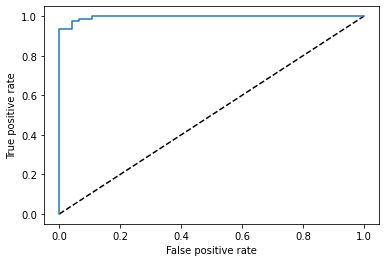

In [85]:
plt.plot([0,1],[0,1],'k--')
# [0,1] means in x axis the values will vary from 0 to 1
# [0,1] means in y axis the values will vary from 0 to 1
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In this curve, the points indicates the TPR and FPRs for a particular threshold. 
From this curve we have to find out the best threshold for our model.

In [86]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

#Here we have already considered the default threshold for logistic regression( 0.5) and finding the area under curve for threshold=0.5

In [96]:
auc_score

#We have got a good auc_score for threshold=0.5

0.9490977646108268

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(train_x,train_y)
p=dt.predict(test_x)
ac=accuracy_score(test_y,p)
round(ac,3)

0.952

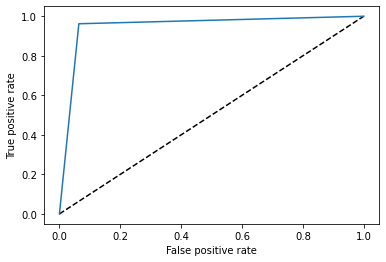

0.9490977646108268

In [89]:
#Decision tree curve
y_pred_prob=dt.predict_proba(test_x)[:,-1]
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

auc_score=roc_auc_score(test_y,dt.predict(test_x))
auc_score

In [90]:
y_pred_prob

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0.])

# Saving the best model

### First method

In [91]:
#from sklearn.externals import joblib 
import joblib

In [92]:
joblib.dump(dt,'dtfile.obj') #Save the file in a location #dt is the object name # dtfile.obj is the name of the file 

['dtfile.obj']

In [93]:
dtc_from_joblib=joblib.load('dtfile.obj') #Load the model from the file.

In [94]:
#Use the loaded model to make predictions

dtc_from_joblib.predict(test_x)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

### Second Method

In [95]:
import pickle

pickle.dump(lg,open('pickledlgfile.pkl','wb')) # wb- open in write binary mode

loaded_model=pickle.load(open('pickledlgfile.pkl','rb')) # rb- open in read binary mode

loaded_model.predict(test_x)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])